# Importing the libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import keras.utils as image
from keras import applications
from keras import Model
import cv2
import random
from keras.layers import Activation, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import keras.backend as K

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Function to create train and test data

In [2]:
def create_batch(path):
    #To create batches of training data for a machine learning model.
    batch = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(path, target_size =(224,224), batch_size =20)
    return batch

# Creating the model

In [3]:
def create_model():
    #To create a model for training and testing.
    mobile = keras.applications.mobilenet.MobileNet()
    x = mobile.layers[-2].output
    x = tf.keras.layers.Flatten()(x)
    predictions = Dense(2, activation = 'softmax')(x)
    model = Model(inputs = mobile.input, outputs = predictions)
    for layer in model.layers[:-23]:
        layer.trainable = False
    return model

# Metrics Function to calculate recall, precision and f1 score

In [4]:
def recall(y_true, y_pred):
    tp = K.sum(K.cast(y_true * y_pred, float))
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'))
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'))
    recall_keras = tp/ (tp+ fn + K.epsilon())
    return recall_keras
def precision(y_true, y_pred):
    tp = K.sum(K.cast(y_true * y_pred, float))
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'))
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'))
    precision_keras = tp / (tp + fp + K.epsilon())
    return precision_keras
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

# Function to train the model

In [5]:
def train_model(model,train_batches,valid_batches):
    model.compile(Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics = ["accuracy", precision, recall, f1])
    with tf.device('/device:CPU:0'):
        history = model.fit(train_batches, steps_per_epoch = len(train_batches), validation_data = valid_batches, validation_steps =3, epochs = 30, verbose =2)
    return history

# Function to plot the loss and accuracy

In [25]:
def plot_history(history):
    epochs=30
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    loss = history.history['precision']
    val_loss = history.history['val_precision']
    
    loss = history.history['recall']
    val_loss = history.history['val_recall']
    
    loss = history.history['f1']
    val_loss = history.history['val_f1']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.ylim(0.5, 1.01)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 2)
    plt.ylim(0.5, 1.01)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Loss')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2,1,1.01)
    plt.ylim(0.5, 1)
    plt.plot(epochs_range, loss, label='Training Precison')
    plt.plot(epochs_range, val_loss, label='Validation Precision')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Precison')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1,2)
    plt.ylim(0.5, 1.01)
    plt.plot(epochs_range, loss, label='Training Recall')
    plt.plot(epochs_range, val_loss, label='Validation Recall')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Recall')
    plt.show()
    
    plt.figure(figsize=(8, 8))
    plt.subplot(2,1,1)
    plt.ylim(0.5, 1.01)
    plt.plot(epochs_range, loss, label='Training F1 Score')
    plt.plot(epochs_range, val_loss, label='Validation F1 Score')
    plt.legend(loc='lower right')
    plt.title('Training and Validation F1 Score')
    plt.show()

# Preprocessing the image inputted from user and predicting the output

In [7]:
def prediction(model, path):

    #plot the image
    img = cv2.imread(path)
    plt.imshow(img)
    plt.show()
    predict_img = image.load_img(path, target_size = (224,224))
    predict_img = image.img_to_array(predict_img)
    predict_img = np.expand_dims(predict_img, axis=0)
    with tf.device('/device:CPU:0'):
        result = model.predict(predict_img)
    if result[0][0] == 1:
        prediction = 'No Crack Detected'
        print(prediction)
    else:
        prediction = 'Crack Detected'
        print(prediction)

# Training the model and saving the weights

In [8]:
#defining training, validation and test paths
train_path = r'C:\Users\Dell\Downloads\archive (4)\train'
valid_path = r'C:\Users\Dell\Downloads\archive (4)\valid'
test_path = r'C:\Users\Dell\Downloads\archive (4)\test'

#creating batches
train_batches = create_batch(train_path)
valid_batches = create_batch(valid_path)
test_batches = create_batch(test_path)

#creating the model
model = create_model()

#training the model
history = train_model(model,train_batches,valid_batches)


#saving the model
model.save('mobilenet_crack_detection.h5')

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/30
30/30 - 30s - loss: 0.3683 - accuracy: 0.8950 - precision: 0.8956 - recall: 0.8956 - f1: 0.8956 - val_loss: 0.6110 - val_accuracy: 0.8667 - val_precision: 0.8556 - val_recall: 0.8556 - val_f1: 0.8556 - 30s/epoch - 994ms/step
Epoch 2/30
30/30 - 26s - loss: 0.0337 - accuracy: 0.9950 - precision: 0.9915 - recall: 0.9915 - f1: 0.9915 - val_loss: 0.2303 - val_accuracy: 0.9333 - val_precision: 0.9209 - val_recall: 0.9209 - val_f1: 0.9209 - 26s/epoch - 866ms/step
Epoch 3/30
30/30 - 25s - loss: 0.0456 - accuracy: 0.9817 - precision: 0.9832 - recall: 0.9832 - f1: 0.9832 - val_loss: 0.1347 - val_accuracy: 0.9667 - val_precision: 0.9579 - val_recall: 0.9579 - val_f1: 0.9579 - 25s/epoch - 842ms/step
Epoch 4/30
30/30 - 26s - loss: 0.0299 - accuracy: 0.9917 - precision: 0.9905 - recall: 0.9905 - f1: 0.9905 - val_loss: 0.0683 - val_accuracy: 0.9667 - val_precision: 0.9

# Plotting the graphs

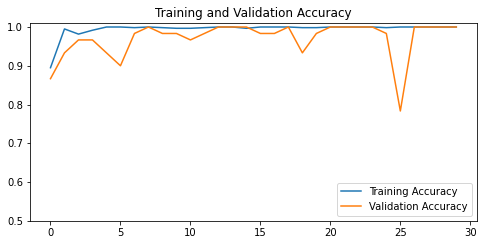

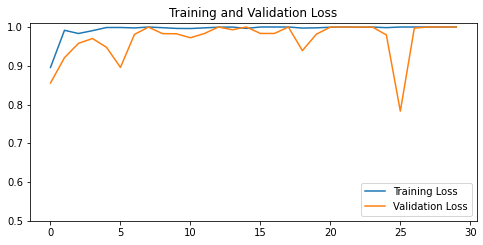

<ipython-input-25-63d5efefbb1f>:38: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,1,1.01)


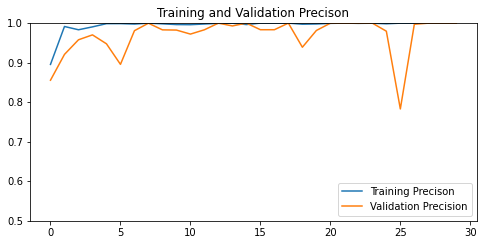

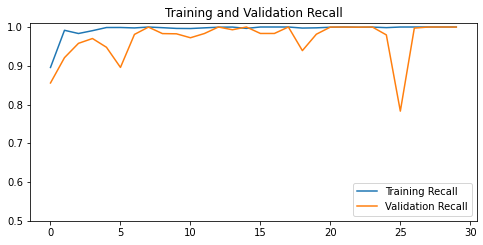

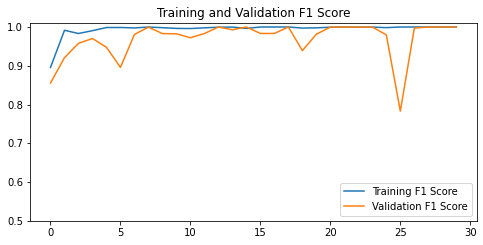

In [26]:
plot_history(history)

# Evaluation of the model

In [14]:
with tf.device('/cpu:0'):
    results = model.evaluate(test_batches, verbose=0)

print("Precision is ", results[2])
print("Recall is ", results[3])
print("F1 score is ", results[4])

Precision is  0.9999573826789856
Recall is  0.9999574422836304
F1 score is  0.9999573826789856


# Predicting the output on an image

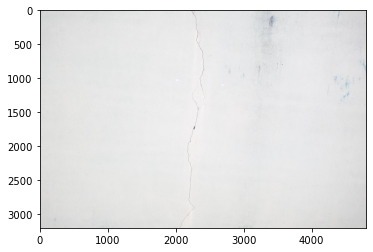

1/1 [==============================] - 1s 1s/step
Crack Detected


In [16]:
#load the model and predict
model = keras.models.load_model('mobilenet_crack_detection.h5', custom_objects={'precision': precision, 'recall': recall, 'f1': f1})

prediction(model, r'C:\Users\Dell\Downloads\archive (4)\predict\img_1130.jpg')